In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

import datetime
seed=2022


In [46]:
!pip install pickle5
import pickle5 as pickle
with open('all_streaks.pickle', "rb") as fh:
    streak_dictionary = pickle.load(fh)


/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


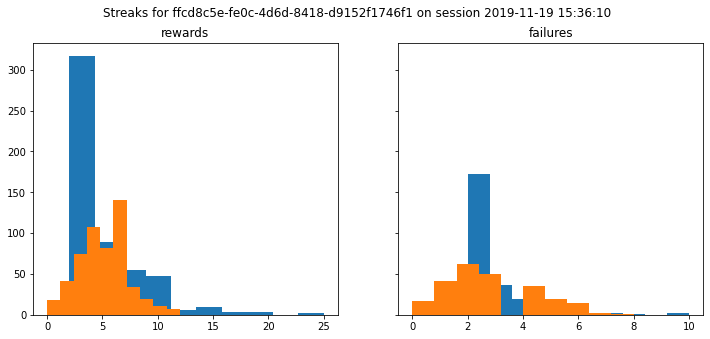

In [49]:
guy = 'ffcd8c5e-fe0c-4d6d-8418-d9152f1746f1'
session = datetime.datetime(2019, 11, 19, 15, 36, 10)
one_guy_one_session = streak_dictionary[guy][session]
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize= (12,5))
fig.suptitle('Streaks for {g} on session {s}'.format(g=guy,s=session))
poisson_vals_rew = np.random.poisson(np.mean(one_guy_one_session['rewards']),len(one_guy_one_session['rewards']))
poisson_vals_fail = np.random.poisson(-np.mean(one_guy_one_session['failures']),len(one_guy_one_session['failures']))

ax1.hist(one_guy_one_session['rewards'])
ax1.hist(poisson_vals_rew)
ax1.set_title('rewards')
ax2.hist(-one_guy_one_session['failures'])
ax2.hist(poisson_vals_fail)
ax2.set_title('failures')
fig.show()

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


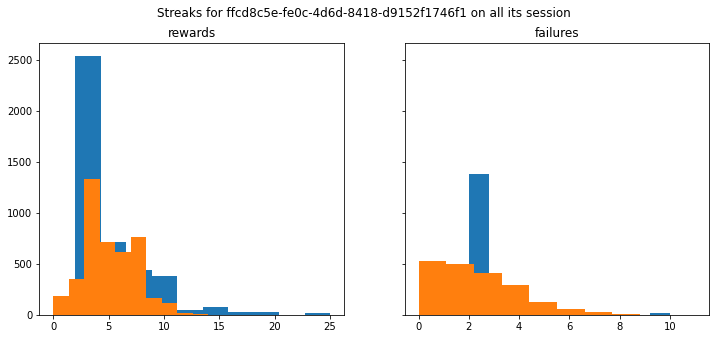

In [50]:
guy = 'ffcd8c5e-fe0c-4d6d-8418-d9152f1746f1'
session = datetime.datetime(2019, 11, 19, 15, 36, 10)
one_guy_all_sessions = streak_dictionary[guy]
all_rewards_session = [streak_dictionary[guy][session]['rewards'] for session in streak_dictionary[guy].keys()]
all_rewards_session = [item for sublist in all_rewards_session for item in sublist]

all_failures_session = [streak_dictionary[guy][session]['failures'] for session in streak_dictionary[guy].keys()]
all_failures_session = [item for sublist in all_failures_session for item in sublist]

poisson_vals_rew_session = np.random.poisson(np.mean(all_rewards_session),len(all_rewards_session))
poisson_vals_fail_session = np.random.poisson(-np.mean(all_failures_session),len(all_failures_session))


fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize= (12,5))
fig.suptitle('Streaks for {g} on all its session'.format(g=guy))
ax1.hist(all_rewards_session)
ax1.hist(poisson_vals_rew_session)
ax1.set_title('rewards')
ax2.hist([-i for i in all_failures_session])
ax2.hist(poisson_vals_fail_session)
ax2.set_title('failures')
fig.show()


/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


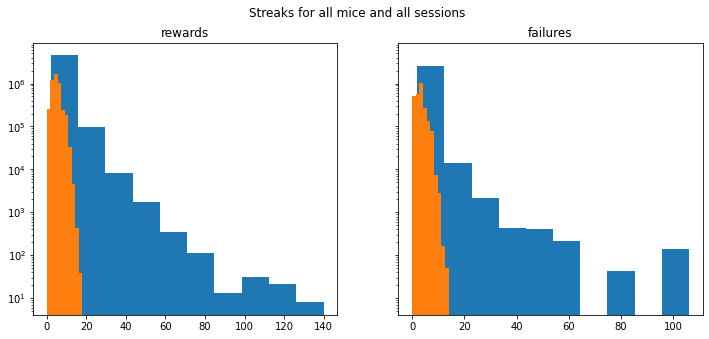

In [51]:
all_rewards_everybody = [streak_dictionary[guy][session]['rewards'] for guy in streak_dictionary.keys() for session in streak_dictionary[guy].keys() ]
all_rewards_everybody = [item for sublist in all_rewards_everybody for item in sublist]

all_failures_everybody = [streak_dictionary[guy][session]['failures'] for guy in streak_dictionary.keys() for session in streak_dictionary[guy].keys() ]
all_failures_everybody = [item for sublist in all_failures_everybody for item in sublist]

poisson_vals_rew_all = np.random.poisson(np.mean(all_rewards_everybody),len(all_rewards_everybody))
poisson_vals_fail_all = np.random.poisson(-np.mean(all_failures_everybody),len(all_failures_everybody))


fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize= (12,5))
fig.suptitle('Streaks for all mice and all sessions')
ax1.hist(all_rewards_everybody)
ax1.hist(poisson_vals_rew_all)
ax1.set_yscale('log')
ax1.set_title('rewards')

ax2.hist([-i for i in all_failures_everybody])
ax2.hist(poisson_vals_fail_all)
ax2.set_yscale('log')
ax2.set_title('failures')
fig.show()